<a href="https://colab.research.google.com/github/harsh78kashyap/repo1/blob/main/22bds0086.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# 1. Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/recid.csv")

# DATA EXPLORATION
# 2. Print the entire dataset
print(df)

# 3. Display dataset structure and attributes
print("Dataset Dimensions:", df.shape)
print("Attribute Names:", df.columns.tolist())
print("Dataset Structure:")
print(df.info())

# 4. Display first and last 3 rows
print("First 3 rows:")
print(df.head(3))
print("Last 3 rows:")
print(df.tail(3))






      rownames  black  alcohol  drugs  super  married  felon  workprg  \
0            1      0        1      0      1        1      0        1   
1            2      1        0      0      1        0      1        1   
2            3      0        0      0      0        0      0        1   
3            4      0        0      1      1        0      1        1   
4            5      0        0      1      1        0      0        0   
...        ...    ...      ...    ...    ...      ...    ...      ...   
1440      1441      0        1      1      1        0      0        0   
1441      1442      1        0      0      1        1      1        0   
1442      1443      1        0      0      0        0      0        1   
1443      1444      0        0      0      1        1      0        1   
1444      1445      0        0      0      1        0      0        0   

      property  person  priors  educ  rules  age  tserved  follow  durat  \
0            0       0       0     7      2  44

Are there any NA values? False
Missing Values Summary:
rownames    0
black       0
drugs       0
super       0
married     0
felon       0
workprg     0
property    0
person      0
priors      0
educ        0
rules       0
tserved     0
follow      0
durat       0
cens        0
ldurat      0
dtype: int64
Proportion of Missing Values:
rownames    0.0
black       0.0
drugs       0.0
super       0.0
married     0.0
felon       0.0
workprg     0.0
property    0.0
person      0.0
priors      0.0
educ        0.0
rules       0.0
tserved     0.0
follow      0.0
durat       0.0
cens        0.0
ldurat      0.0
dtype: float64
Total number of missing values: 0


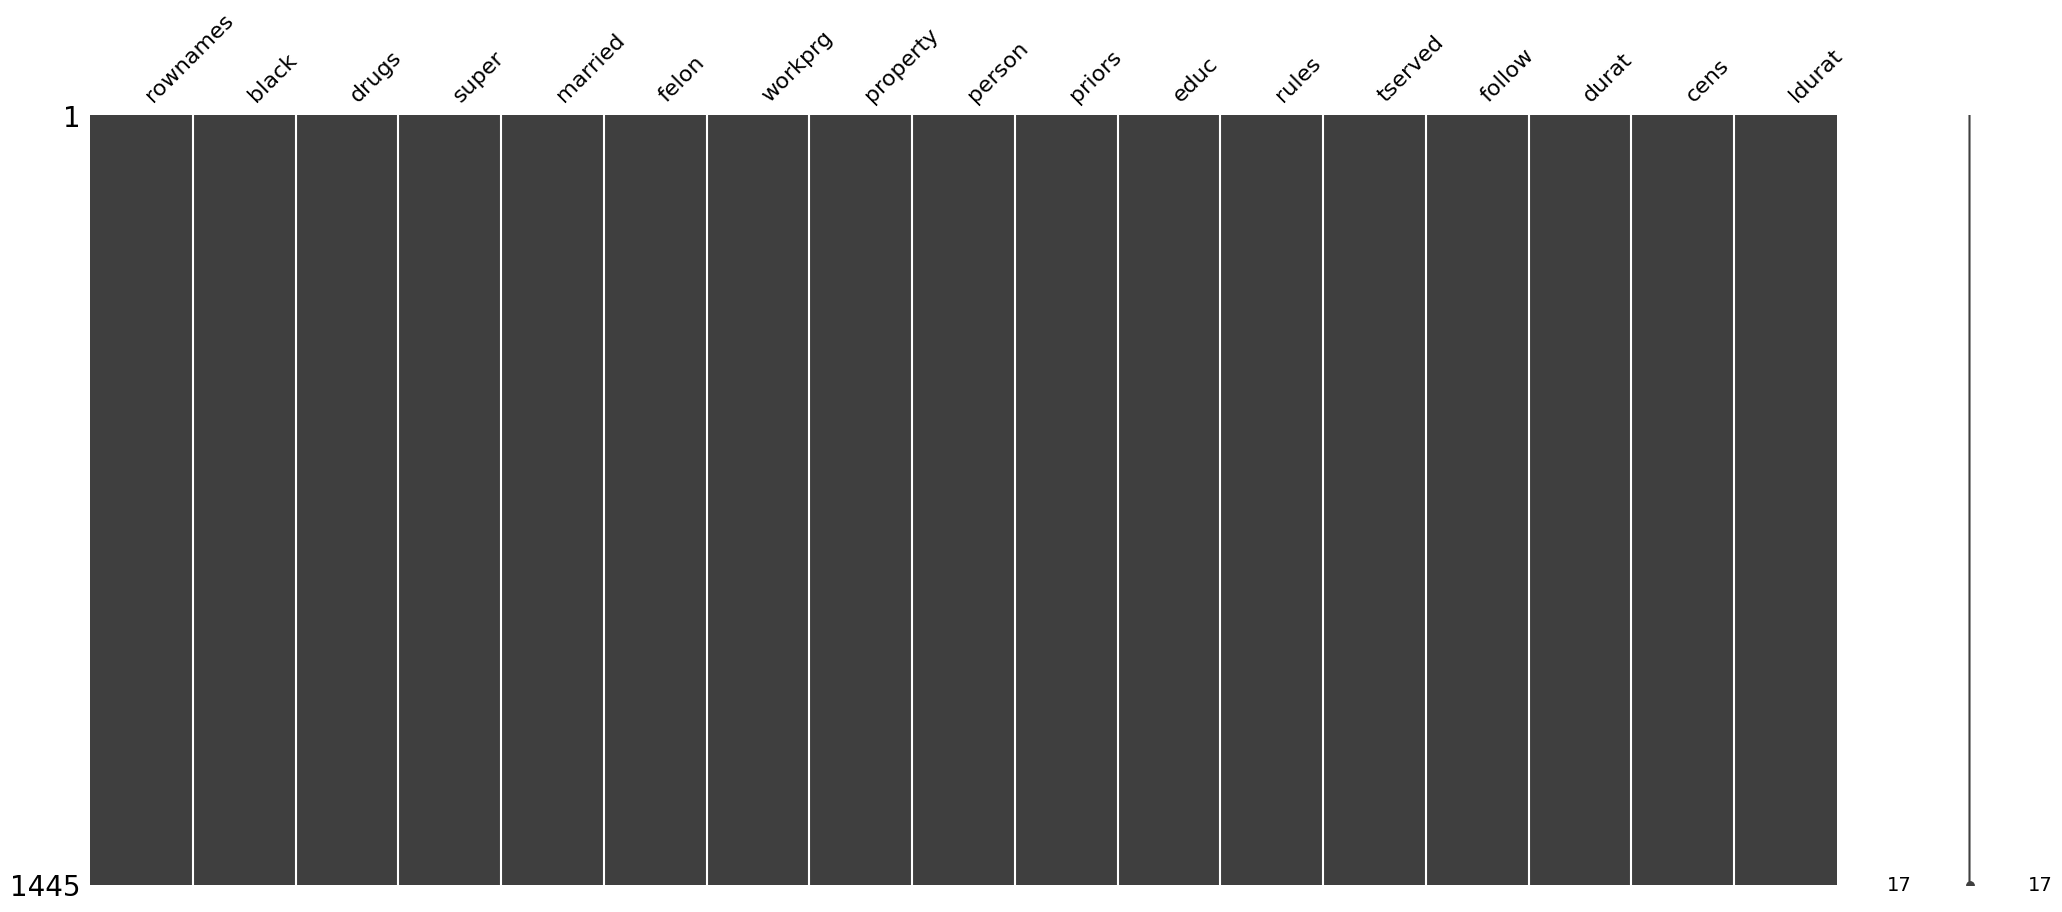

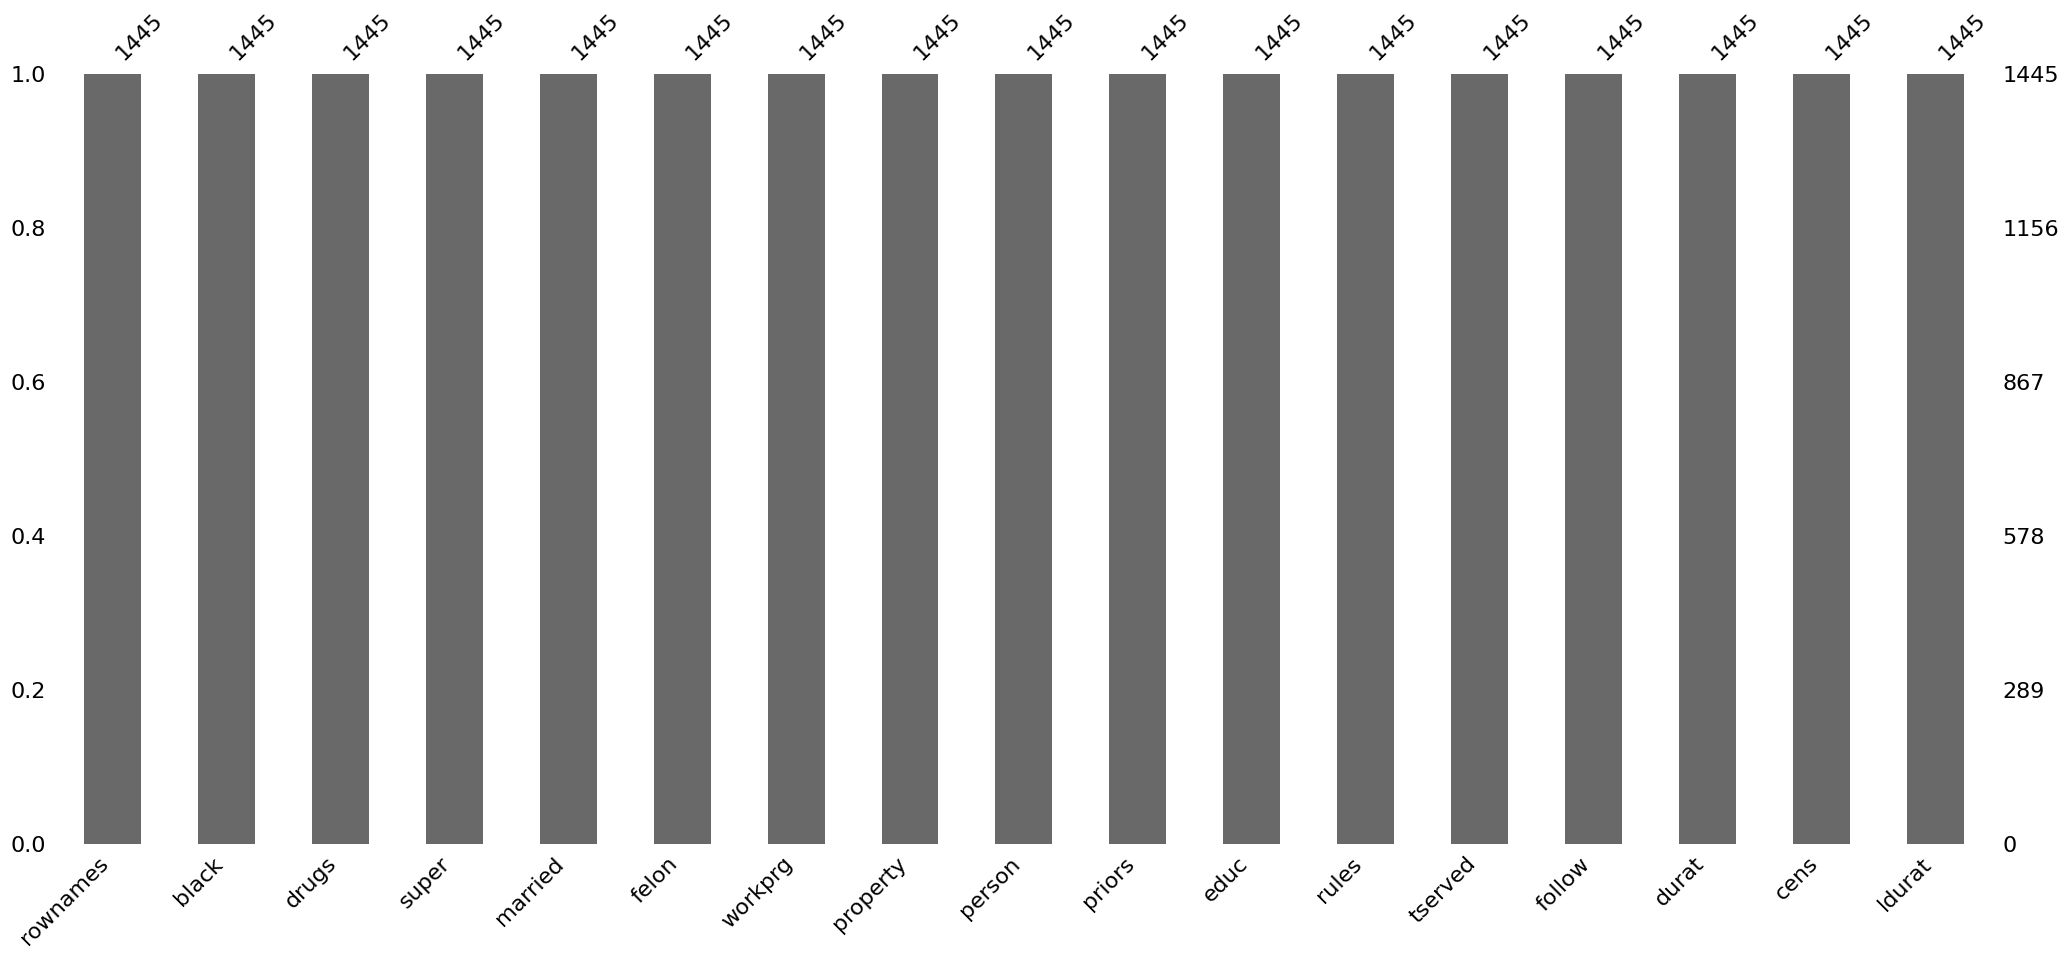

Dataset Dimensions before removing missing values: (1445, 17)
Dataset after removing missing values: (1445, 17)


In [18]:
# HANDLING MISSING DATA
# 5. Check if there are any missing values
print("Are there any NA values?", df.isna().any().any())

# 6. Summary of missing values
print("Missing Values Summary:")
print(df.isna().sum())

# 7. Total missing values per column (proportion)
print("Proportion of Missing Values:")
print(df.isna().mean())

# 8. Total missing values in dataset
print("Total number of missing values:", df.isna().sum().sum())

# 9. Count the total number of complete values in alcohol and drugs
if "alcohol" in df.columns and "drugs" in df.columns:
    print("Complete values in alcohol:", df["alcohol"].notna().sum())
    print("Complete values in drugs:", df["drugs"].notna().sum())

# 10. Missing values visualization
msno.matrix(df)
plt.show()
msno.bar(df)
plt.show()

# 11. Row-wise deletion of missing values
print("Dataset Dimensions before removing missing values:", df.shape)
df_cleaned = df.dropna()
print("Dataset after removing missing values:", df_cleaned.shape)

In [19]:
# DATA CLEANING
# 12. Delete a column by index
df.drop(df.columns[2], axis=1, inplace=True)

# 13. Find non-numeric values
non_numeric_counts = df.apply(lambda col: col.map(lambda x: not str(x).replace('.', '', 1).isdigit()).sum())
print("Non-numeric values per column:")
print(non_numeric_counts)

# 14. Replace missing values in '' column with mean and convert to numeric
if "drugs" in df.columns:
    df["drugs"] = pd.to_numeric(df["drugs"], errors='coerce')
    df["drugs"].fillna(df["drugs"].mean(), inplace=True)


Non-numeric values per column:
rownames    0
black       0
super       0
married     0
felon       0
workprg     0
property    0
person      0
priors      0
educ        0
rules       0
tserved     0
follow      0
durat       0
cens        0
ldurat      0
dtype: int64


Statistical Summary:
          rownames        black        super      married        felon  \
count  1445.000000  1445.000000  1445.000000  1445.000000  1445.000000   
mean    723.000000     0.485121     0.694118     0.255363     0.314187   
std     417.279882     0.499952     0.460940     0.436216     0.464352   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%     362.000000     0.000000     0.000000     0.000000     0.000000   
50%     723.000000     0.000000     1.000000     0.000000     0.000000   
75%    1084.000000     1.000000     1.000000     1.000000     1.000000   
max    1445.000000     1.000000     1.000000     1.000000     1.000000   

           workprg     property       person       priors         educ  \
count  1445.000000  1445.000000  1445.000000  1445.000000  1445.000000   
mean      0.465052     0.254671     0.053287     1.431834     9.702422   
std       0.498950     0.435827     0.224683     2.850443     2.441567   
min       0.0000

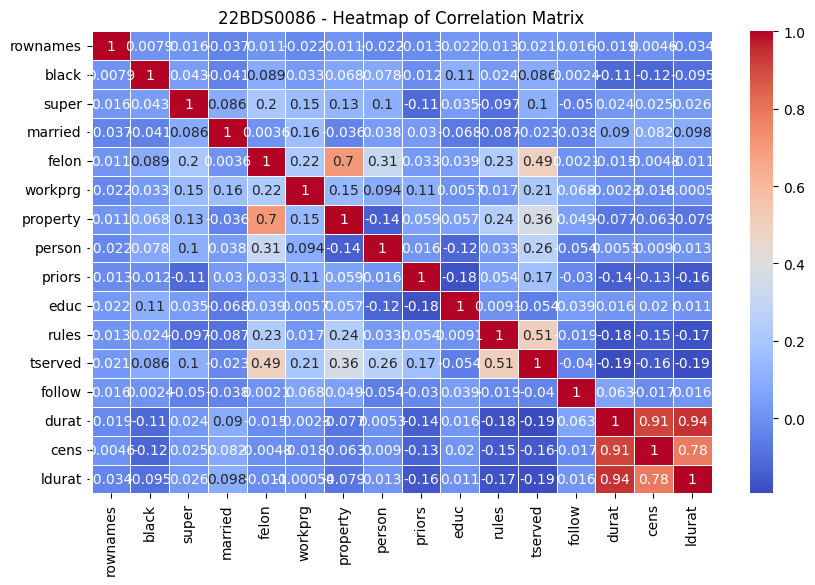

Correlation Matrix:
          rownames     black     super   married     felon   workprg  \
rownames  1.000000  0.007924  0.016346 -0.037315  0.011387 -0.022299   
black     0.007924  1.000000  0.043344 -0.041311  0.088760  0.033310   
super     0.016346  0.043344  1.000000  0.085659  0.200182  0.152222   
married  -0.037315 -0.041311  0.085659  1.000000  0.003641  0.160350   
felon     0.011387  0.088760  0.200182  0.003641  1.000000  0.223777   
workprg  -0.022299  0.033310  0.152222  0.160350  0.223777  1.000000   
property  0.011054  0.068255  0.129495 -0.036331  0.702794  0.146051   
person   -0.022137  0.077961  0.103999  0.037710  0.310693  0.093841   
priors   -0.012833 -0.011525 -0.112863  0.029882  0.033458  0.106543   
educ      0.021976  0.106432  0.035364 -0.068399  0.038543  0.005669   
rules     0.012968  0.024131 -0.096886 -0.087447  0.228570  0.016547   
tserved   0.021090  0.086123  0.103591 -0.022882  0.494381  0.211314   
follow    0.016048  0.002392 -0.049560 -0.03

In [20]:
# STATISTICAL ANALYSIS
# 15. Statistical summary
print("Statistical Summary:")
print(df.describe())

# 16. Central tendency measures
print("Mean:", df.mean(numeric_only=True))
print("Median:", df.median(numeric_only=True))
print("Mode:", df.mode().iloc[0])

# 17. Dispersion measures for 'alcohol' column
if "alcohol" in df.columns:
    print("Alcohol SD:", df["alcohol"].std())
    print("Alcohol Variance:", df["alcohol"].var())

# 18. Quartiles
if "alcohol" in df.columns:
    print("Quartiles:")
    print(df["alcohol"].quantile([0.25, 0.5, 0.75]))

# 19. Interquartile Range (IQR)
if "alcohol" in df.columns:
    Q1 = df["alcohol"].quantile(0.25)
    Q3 = df["alcohol"].quantile(0.75)
    IQR = Q3 - Q1
    print("Interquartile Range (IQR):", IQR)

# 20. Correlation matrix and Heatmap
print("Correlation Matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)

#21 Display Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("22BDS0086 - Heatmap of Correlation Matrix")
plt.show()
print("Correlation Matrix:")
print(df.corr())


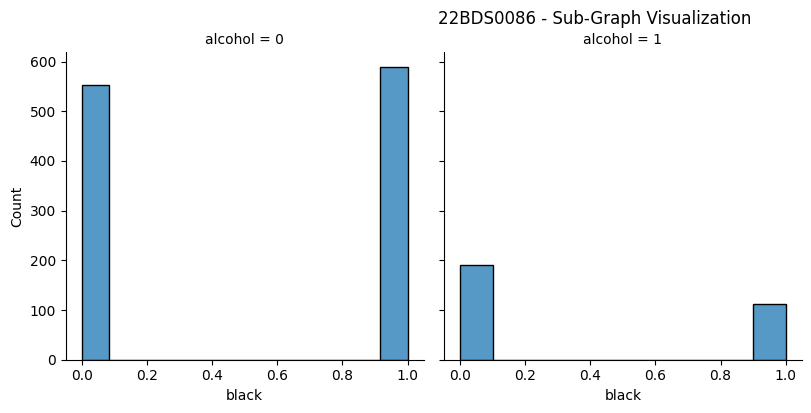

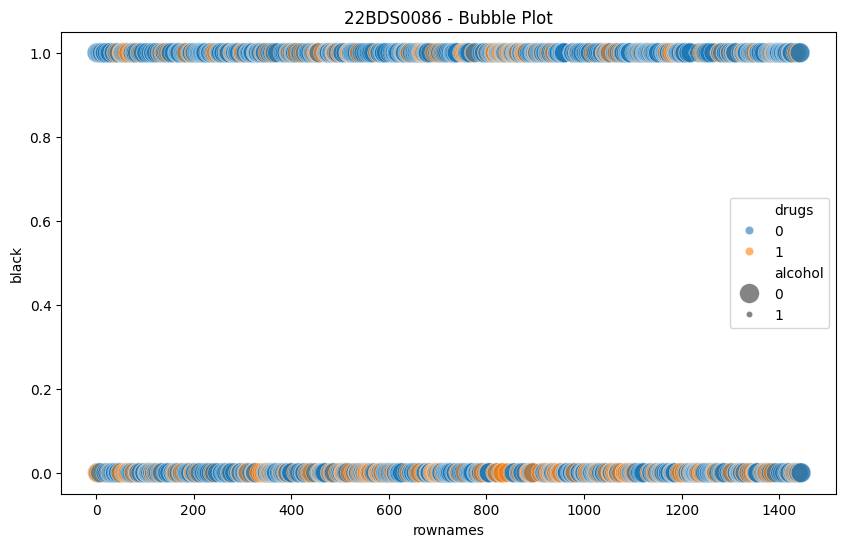

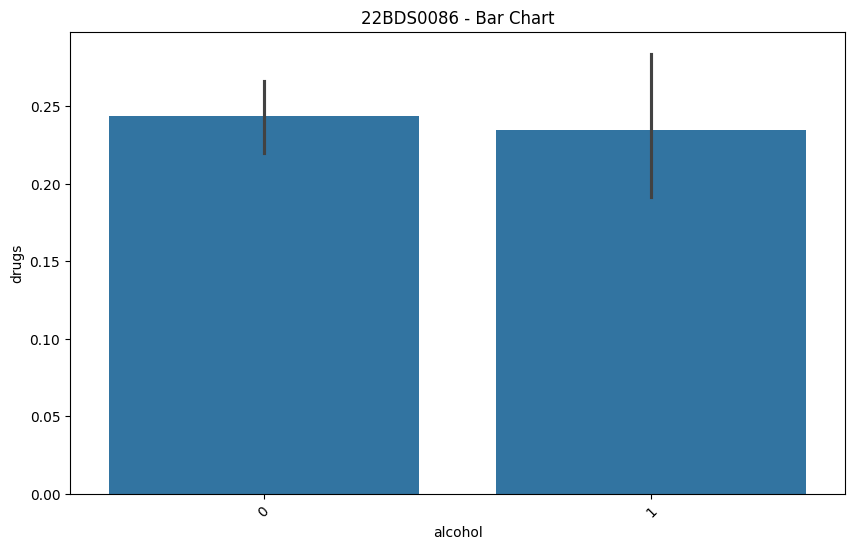

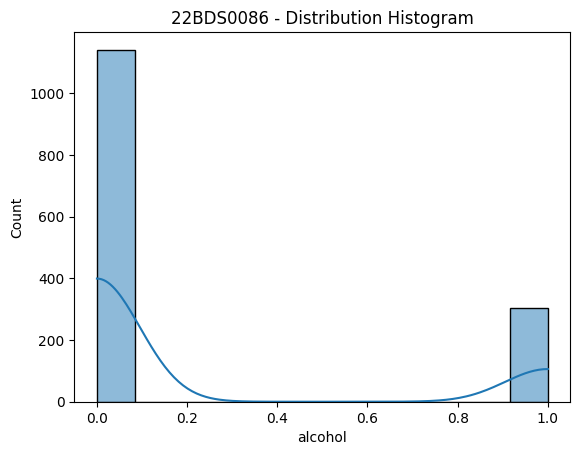

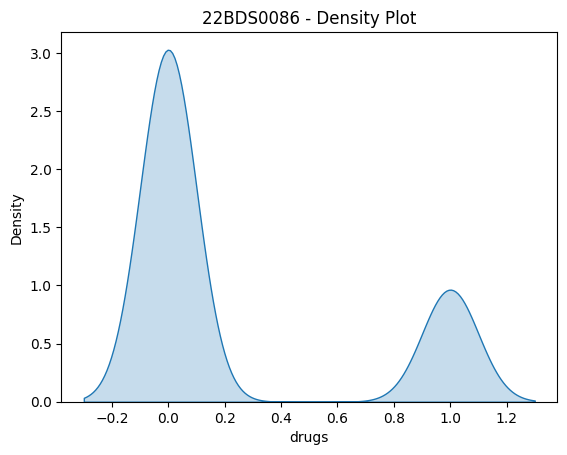

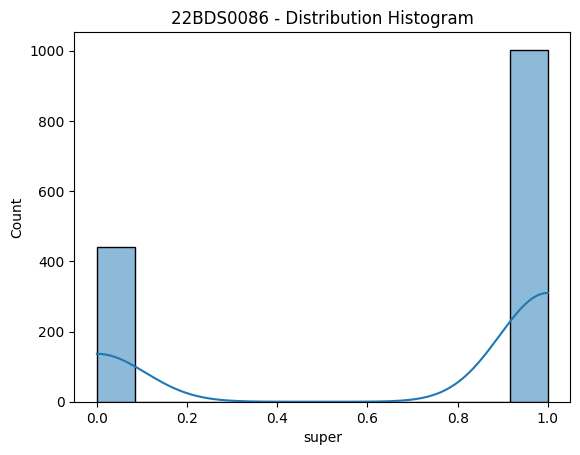

In [26]:
# DATA VISUALIZATION

# 22. Sub-Graph Visualization
if df.shape[1] > 2:
    g = sns.FacetGrid(df, col=df.columns[2], col_wrap=3, height=4)
    g.map_dataframe(sns.histplot, df.columns[1])
    plt.suptitle("22BDS0086 - Sub-Graph Visualization", y=1.02)
    plt.show()

# 23. Bubble Plot
if df.shape[1] > 3:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], size=df.iloc[:, 2], hue=df.iloc[:, 3], sizes=(20, 200), alpha=0.6)
    plt.title("22BDS0086 - Bubble Plot")
    plt.legend()
    plt.show()

# 24. Bar Chart
if df.shape[1] > 1:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df.columns[2], y=df.iloc[:, 3], data=df)
    plt.title("22BDS0086 - Bar Chart")
    plt.xticks(rotation=45)
    plt.show()
# 25. Univariate Analysis
sns.histplot(df.select_dtypes(include=[np.number]).iloc[:, 2], kde=True)
plt.title("22BDS0086 - Distribution Histogram")
plt.show()

#26  Density Plot
sns.kdeplot(df.select_dtypes(include=[np.number]).iloc[:, 3], fill=True)
plt.title("22BDS0086 - Density Plot")
plt.show()
sns.histplot(df.select_dtypes(include=[np.number]).iloc[:, 4], kde=True)
plt.title("22BDS0086 - Distribution Histogram")
plt.show()


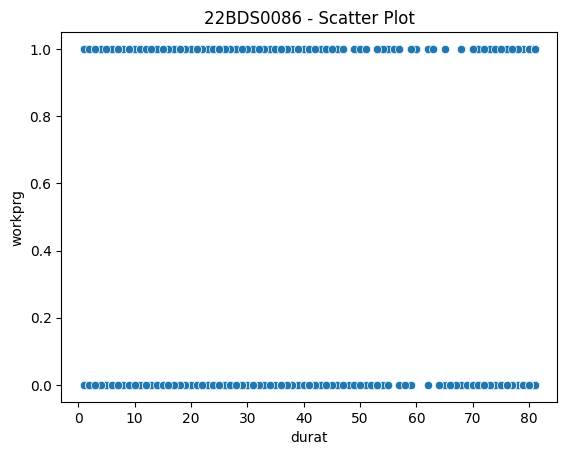

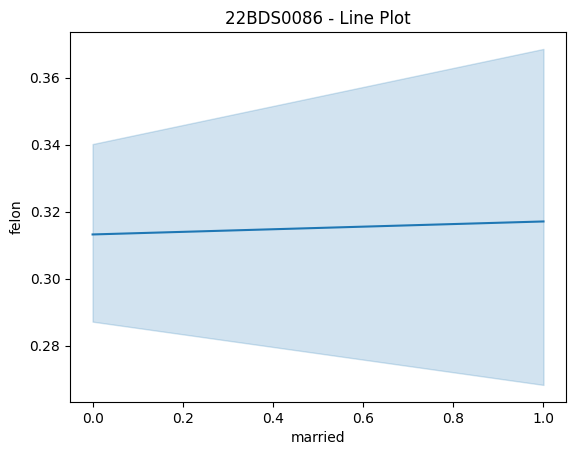

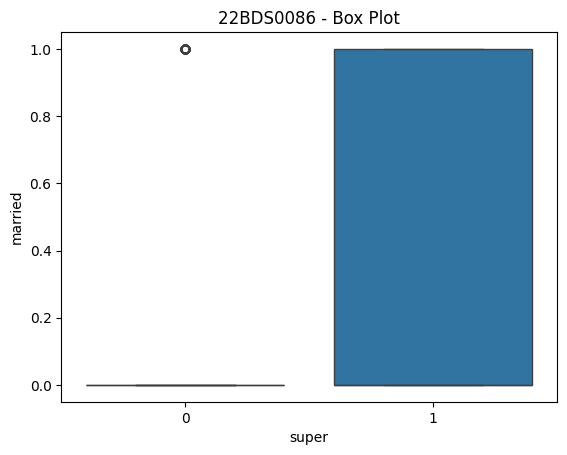

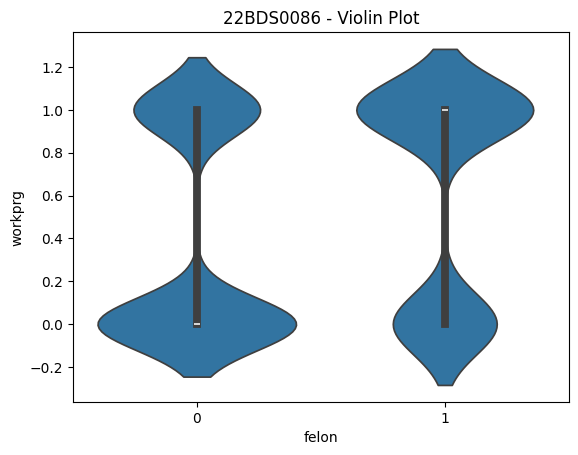

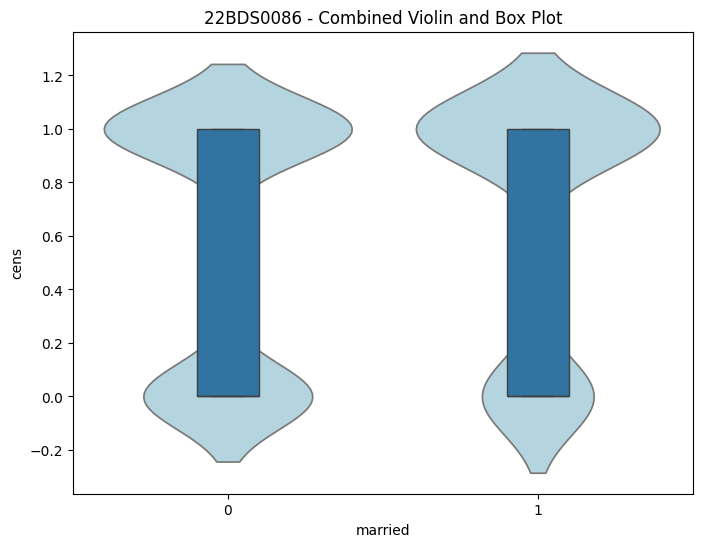

In [32]:
# 27. Bivariate Analysis (Scatter Plot, Line Plot, Box Plot, Violin Plot, and Combined Violin-Box Plot)
if df.shape[1] > 2:
    sns.scatterplot(x=df.iloc[:, 15], y=df.iloc[:, 7])
    plt.title("22BDS0086 - Scatter Plot")
    plt.show()

    sns.lineplot(x=df.iloc[:, 5], y=df.iloc[:, 6])
    plt.title("22BDS0086 - Line Plot")
    plt.show()

    sns.boxplot(x=df.iloc[:, 4], y=df.iloc[:, 5])
    plt.title("22BDS0086 - Box Plot")
    plt.show()

    sns.violinplot(x=df.iloc[:, 6], y=df.iloc[:, 7])
    plt.title("22BDS0086 - Violin Plot")
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.violinplot(x=df.iloc[:, 5], y=df.iloc[:, 16], inner=None, color="lightblue")
    sns.boxplot(x=df.iloc[:, 5], y=df.iloc[:, 6], width=0.2)
    plt.title("22BDS0086 - Combined Violin and Box Plot")
    plt.show()

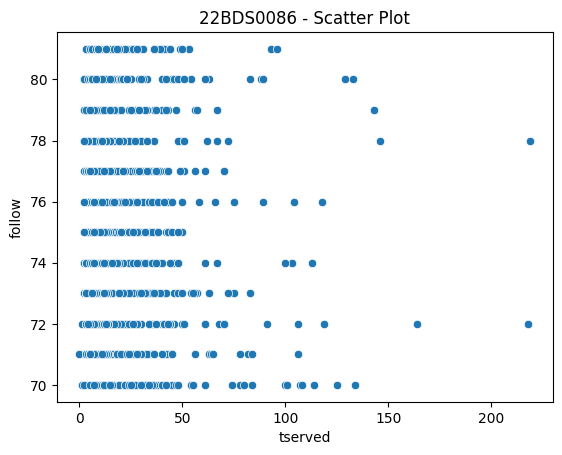

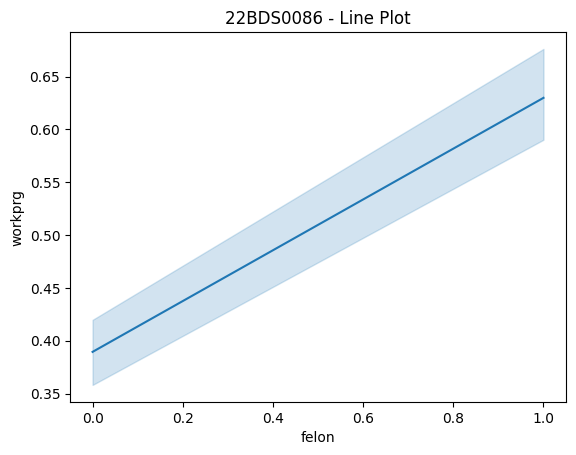

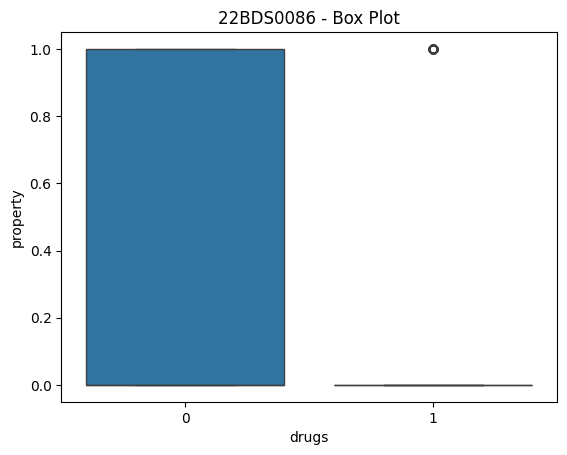

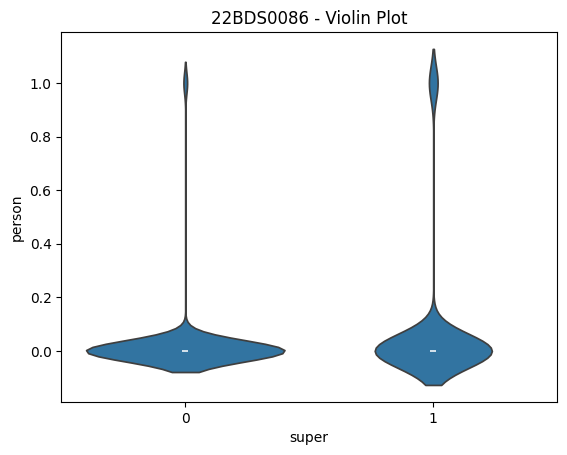

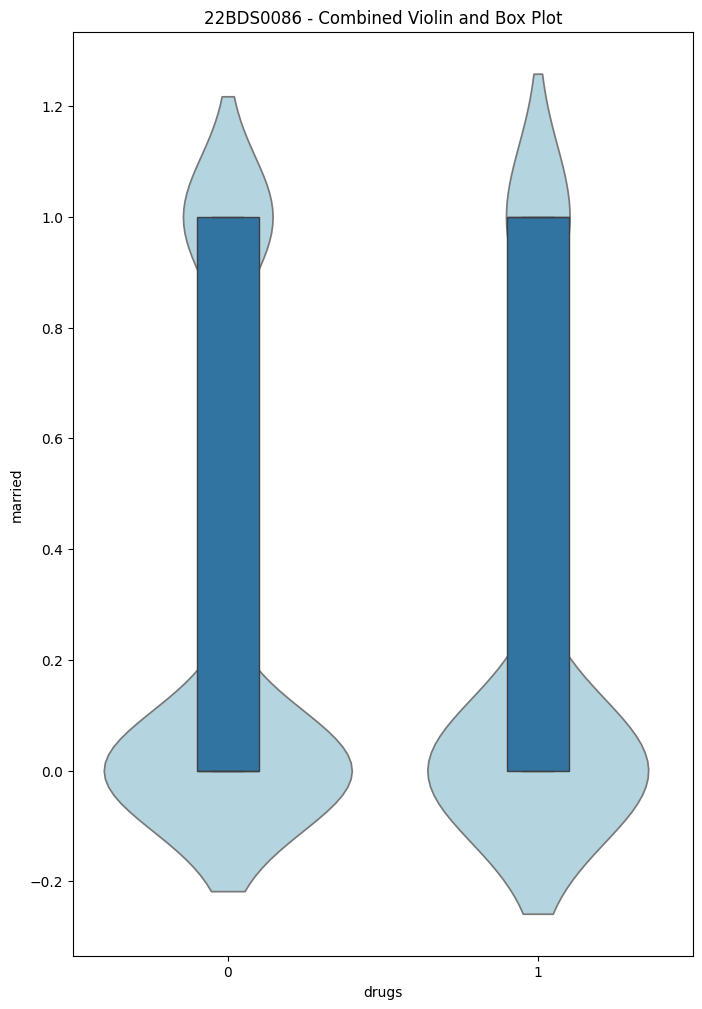

In [39]:
# MULTIVARIATE ANALYSIS

# 29. Multivariate Scatter, Line, Box, and Violin Plots
if df.shape[1] > 3:
    sns.scatterplot(x=df.iloc[:, 13], y=df.iloc[:, 14])
    plt.title("22BDS0086 - Scatter Plot")
    plt.show()

    sns.lineplot(x=df.iloc[:, 6], y=df.iloc[:, 7])
    plt.title("22BDS0086 - Line Plot")
    plt.show()

    sns.boxplot(x=df.iloc[:, 3], y=df.iloc[:, 8])
    plt.title("22BDS0086 - Box Plot")
    plt.show()

    sns.violinplot(x=df.iloc[:, 4], y=df.iloc[:, 9])
    plt.title("22BDS0086 - Violin Plot")
    plt.show()

    plt.figure(figsize=(8, 12))
    sns.violinplot(x=df.iloc[:, 3], y=df.iloc[:, 5], inner=None, color="lightblue")
    sns.boxplot(x=df.iloc[:, 4], y=df.iloc[:, 7], width=0.2)
    plt.title("22BDS0086 - Combined Violin and Box Plot")
    plt.show()



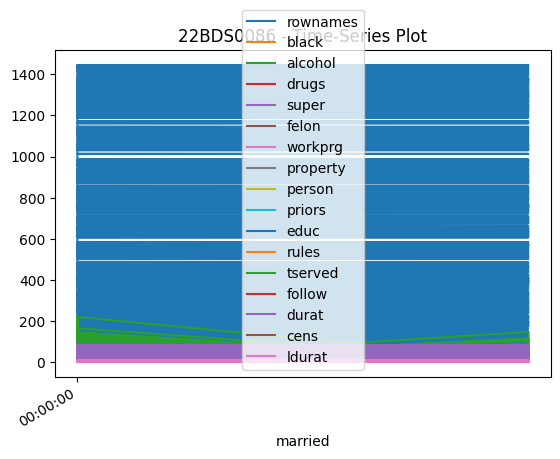

In [43]:
# TIME-SERIES ANALYSIS
# 23. Time-Series Analysis (if applicable)
if "married" in df.columns:
    df["married"] = pd.to_datetime(df["married"], errors='coerce')
    df.set_index("married", inplace=True)
    df.plot()
    plt.title("22BDS0086 - Time-Series Plot")
    plt.show()


